##Data Loading

In [80]:
import pandas as pd
data_test = 'https://raw.githubusercontent.com/aryan-bu/BA820/main/drug_reviews_dataset/drugsComTest_raw.tsv'
data_train = 'https://raw.githubusercontent.com/aryan-bu/BA820/main/drug_reviews_dataset/drugsComTrain_raw.tsv'

df_test = pd.read_csv(data_test, delimiter='\t')
df_train = pd.read_csv(data_train, delimiter='\t')

In [81]:
df_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [82]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [83]:
df_test.shape

(53766, 7)

In [84]:
df_train.shape

(161297, 7)

In [85]:
df = pd.concat([df_test, df_train])
df.shape

(215063, 7)

In [86]:
df = df.rename(columns={'Unnamed: 0': 'index'})
df = df.sort_values(by='index', ascending=True)
df.head()

,index,drugName,condition,review,rating,date,usefulCount
47805,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
93135,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11
143331,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7
57030,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12
106347,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4


##Preprocessing

###Stop word removal

In [87]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['review'] = df['review'].apply(remove_stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
df['review']

47805     `` depo injection since January 2015 , bleedin...
93135     `` & # 039 ; 21 years old recently found might...
143331    `` shot 11 years month ago , never 1 period ev...
57030     `` Ive four shots point . birth control pills ...
106347    `` total 3 shots . got first one leaving hospi...
                                ...                        
59738     `` & # 039 ; ever use , 4 years old sick docto...
81768     `` acute maxillary sinusitis . Day two , takin...
135055    `` took Amox Clav 2x day 7 days urinary tract ...
41572     `` Day 1 - serious pain diminished hearing rig...
22470     `` Every time sinus infection prescribed Augme...
Name: review, Length: 215063, dtype: object

###Apostrophe Removed

In place of the ' symbol, we have some unwanted characters. We can remove them for our analysis.

In [89]:
df['review'] = df['review'].str.replace('& # 039 ;', '')
df.head()

,index,drugName,condition,review,rating,date,usefulCount
47805,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"`` depo injection since January 2015 , bleedin...",3.0,"October 28, 2015",4
93135,2,Medroxyprogesterone,Amenorrhea,`` 21 years old recently found might PCOS . ...,10.0,"October 27, 2015",11
143331,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"`` shot 11 years month ago , never 1 period ev...",8.0,"October 27, 2015",7
57030,4,Medroxyprogesterone,Birth Control,`` Ive four shots point . birth control pills ...,9.0,"October 26, 2015",12
106347,5,Medroxyprogesterone,Abnormal Uterine Bleeding,`` total 3 shots . got first one leaving hospi...,1.0,"October 25, 2015",4


###Lower casing the text

In [90]:
df['review'] = df['review'].str.lower()

In [91]:
df['review']

47805     `` depo injection since january 2015 , bleedin...
93135     ``  21 years old recently found might pcos .  ...
143331    `` shot 11 years month ago , never 1 period ev...
57030     `` ive four shots point . birth control pills ...
106347    `` total 3 shots . got first one leaving hospi...
                                ...                        
59738     ``  ever use , 4 years old sick doctor give au...
81768     `` acute maxillary sinusitis . day two , takin...
135055    `` took amox clav 2x day 7 days urinary tract ...
41572     `` day 1 - serious pain diminished hearing rig...
22470     `` every time sinus infection prescribed augme...
Name: review, Length: 215063, dtype: object

In [92]:
df.isnull().sum()

index             0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

In [93]:
df = df.dropna()
df.isnull().sum()

index          0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [94]:
duplicates = df[df.duplicated()]
duplicates

,index,drugName,condition,review,rating,date,usefulCount


There are no duplicate values as well and we can move ahead with our analysis. Since the dataset is large, we can randomly select 20,000 rows for initial analysis.

###Removing Punctuation

In [96]:
import pandas as pd
import string

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

df['review'] = df['review'].apply(remove_punctuation)

In [97]:
df

,index,drugName,condition,review,rating,date,usefulCount
47805,0,Medroxyprogesterone,Abnormal Uterine Bleeding,depo injection since january 2015 bleeding s...,3.0,"October 28, 2015",4
93135,2,Medroxyprogesterone,Amenorrhea,21 years old recently found might pcos got...,10.0,"October 27, 2015",11
143331,3,Medroxyprogesterone,Abnormal Uterine Bleeding,shot 11 years month ago never 1 period even ...,8.0,"October 27, 2015",7
57030,4,Medroxyprogesterone,Birth Control,ive four shots point birth control pills yea...,9.0,"October 26, 2015",12
106347,5,Medroxyprogesterone,Abnormal Uterine Bleeding,total 3 shots got first one leaving hospital...,1.0,"October 25, 2015",4
...,...,...,...,...,...,...,...
59738,232286,Amoxicillin / clavulanate,Sinusitis,ever use 4 years old sick doctor give augme...,1.0,"June 29, 2017",8
81768,232288,Amoxicillin / clavulanate,Sinusitis,acute maxillary sinusitis day two taking th...,9.0,"June 21, 2017",14
135055,232289,Amoxicillin / clavulanate,Urinary Tract Infection,took amox clav 2x day 7 days urinary tract in...,4.0,"June 17, 2017",2
41572,232290,Amoxicillin / clavulanate,Otitis Media,day 1 serious pain diminished hearing right ...,1.0,"June 16, 2017",0


## Sentiment Categorization

In [98]:
df.rating.unique()

array([ 3., 10.,  8.,  9.,  1.,  5.,  2.,  7.,  4.,  6.])

In [99]:
df['sentiment'] = df['rating'].apply(lambda x: 'negative' if x <= 3 else ('neutral' if x <= 6 else 'positive'))

##EDA

###Correlation Matrix

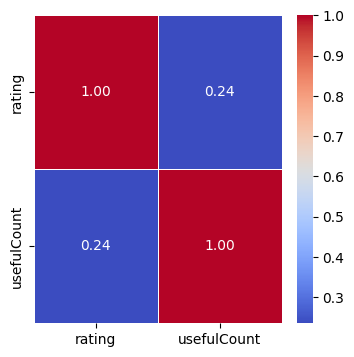

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['rating', 'usefulCount']].corr(numeric_only=True)
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

###Rating Distribution

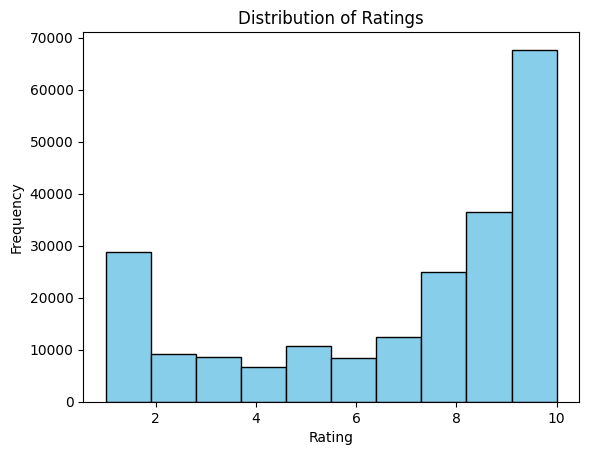

In [101]:
ratings = df['rating']

plt.hist(ratings, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

plt.show()

###UsefulCount Distribution

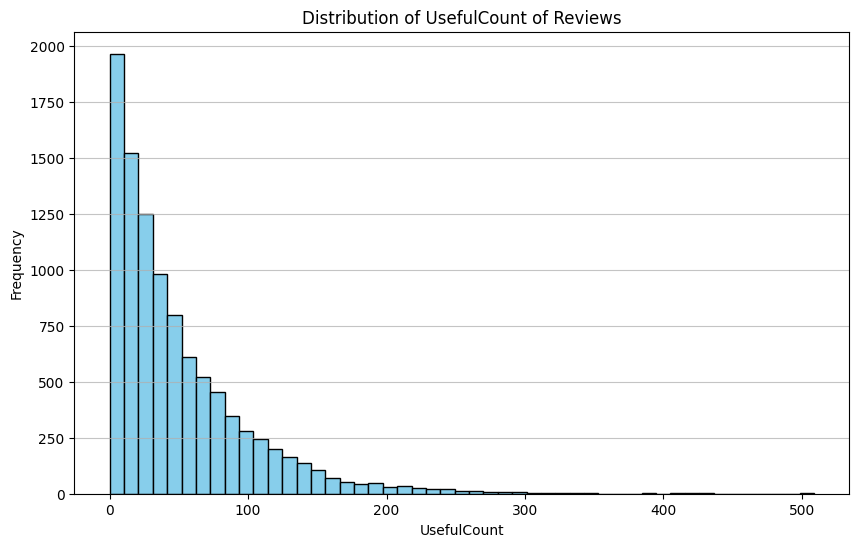

In [105]:
import numpy as np

#np.random.seed(1)
data = np.random.exponential(scale=50, size=10000)

plt.figure(figsize=(10, 6))

bins = np.linspace(0, max(data), 50)
plt.hist(data, bins=bins, color='skyblue',edgecolor="black")

plt.title('Distribution of UsefulCount of Reviews')
plt.xlabel('UsefulCount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

###Time Series of Reviews

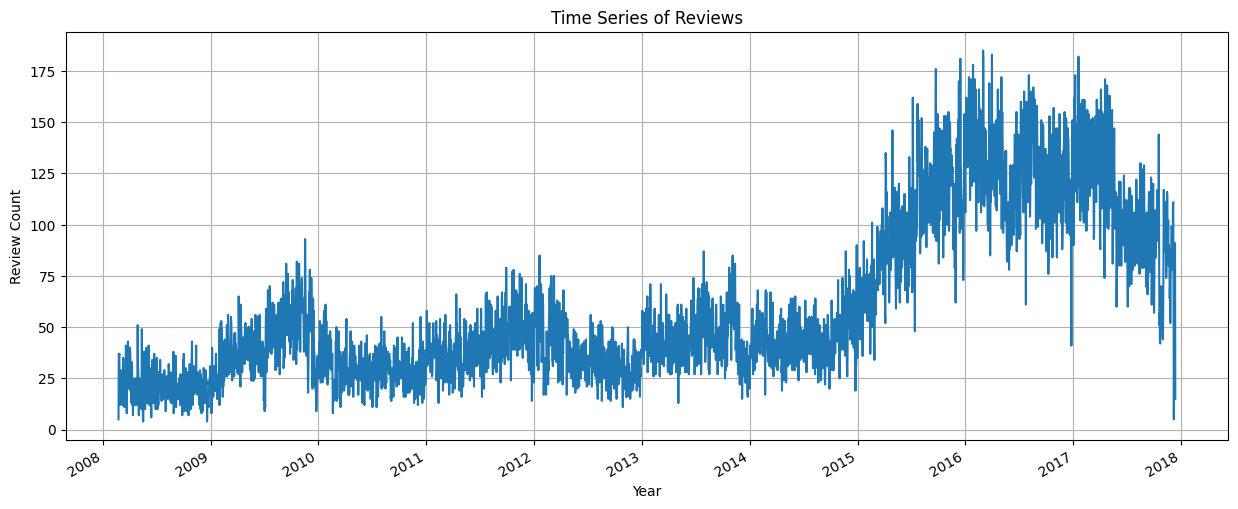

In [106]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of reviews on each day
review_ts = df.groupby('date').size()

# Plot the time series
plt.figure(figsize=(15, 6))
review_ts.plot()
plt.title('Time Series of Reviews')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

##Most Common Conditions

In [107]:
conditions = df['condition'].value_counts()

common_conditions = conditions.head(10)

print(common_conditions)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64


###Best drugs for the conditions

In [108]:
top_conditions = common_conditions.index.tolist()
filtered_df = df[df['condition'].isin(top_conditions)]

avgratings = filtered_df.groupby(['condition', 'drugName'])['rating'].mean().reset_index()

drugs_sorted_best = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, False])

# Output the top 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Best for '{condition}':")
    best_drugs = drugs_sorted_best[drugs_sorted_best['condition'] == condition]['drugName'].head(5).tolist()
    print(best_drugs)
    print('')

Best for 'Birth Control':
['Elinest', 'Low-Ogestrel-21', 'Plan B', 'Zovia 1 / 50', 'Heather']

Best for 'Depression':
['Asendin', 'Forfivo XL', 'Invega', 'Limbitrol DS', 'Niravam']

Best for 'Pain':
['Anacin', 'Anaprox-DS', 'Aspirin / caffeine', 'Bupivacaine liposome', 'Buprenex']

Best for 'Anxiety':
['Alprazolam Intensol', 'Aspirin / meprobamate', 'Diazepam Intensol', 'Lorazepam Intensol', 'Micrainin']

Best for 'Acne':
['Acnex', 'Avar', 'Avita', 'BenzEFoam Ultra', 'Benzoyl peroxide / hydrocortisone']

Best for 'Bipolar Disorde':
['Eskalith-CR', 'Klonopin Wafer', 'Tiagabine', 'Nuvigil', 'Armodafinil']

Best for 'Insomnia':
['Ethchlorvynol', 'Hetlioz', 'Nembutal Sodium', 'Pentobarbital', 'Remeron SolTab']

Best for 'Weight Loss':
['Megace', 'Suprenza', 'T-Diet', 'Megace ES', 'Phentercot']

Best for 'Obesity':
['Belviq XR', 'Desoxyn', 'Fastin', 'Ionamin', 'Methamphetamine']

Best for 'ADHD':
['Dextrostat', 'ProCentra', 'Selegiline', 'Desoxyn', 'Cylert']



###Worst drugs for the conditions

In [109]:
sorted_drugs_worst = avgratings.sort_values(by=['condition', 'rating'], ascending=[True, True])

# Output the worst 5 sorted drugs for each condition
for condition in top_conditions:
    print(f"Worst 5 drugs for '{condition}':")
    worst_drugs = sorted_drugs_worst[sorted_drugs_worst['condition'] == condition]['drugName'].head(5).tolist()
    print(worst_drugs)
    print('')

Worst 5 drugs for 'Birth Control':
['Dasetta 7 / 7 / 7', 'Larin 24 Fe', 'Philith', 'Pirmella 1 / 35', 'Tri-Lo-Estarylla']

Worst 5 drugs for 'Depression':
['Vyvanse', 'Luvox CR', 'Fetzima', 'Levomilnacipran', 'Pamelor']

Worst 5 drugs for 'Pain':
['Capsin', 'Capzasin', 'Dolobid', 'Prialt', 'Ziconotide']

Worst 5 drugs for 'Anxiety':
['Hyzine', 'Vanspar', 'Compazine', 'Prochlorperazine', 'Trileptal']

Worst 5 drugs for 'Acne':
['Tri-Estarylla', 'Junel Fe 1.5 / 30', 'Loestrin Fe 1 / 20', 'Nortrel 1 / 35', 'Microgestin Fe 1.5 / 30']

Worst 5 drugs for 'Bipolar Disorde':
['Carbatrol', 'Risperdal Consta', 'Celexa', 'Depakene', 'Equetro']

Worst 5 drugs for 'Insomnia':
['ZzzQuil', 'Belsomra', 'Suvorexant', 'Valerian', 'Ramelteon']

Worst 5 drugs for 'Weight Loss':
['Contrave', 'Bupropion / naltrexone', 'Fastin', 'Ionamin', 'Qsymia']

Worst 5 drugs for 'Obesity':
['Methylphenidate', 'Alli', 'Bontril PDM', 'Chorionic gonadotropin (hcg)', 'Contrave']

Worst 5 drugs for 'ADHD':
['Tenex', 'Budepr

##Sampling

In [ ]:
import numpy as np
np.random.seed = 42

sample_df = df.sample(n=2000, random_state=42).reset_index()
sample_df.shape

In [ ]:
sample_df

##Tokenization

In [ ]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize, WhitespaceTokenizer
from nltk.tokenize.casual import TweetTokenizer
import nltk
nltk.download('punkt')

In [ ]:
review_len = len(df['review'])
review_len

###Sentence Tokenization

In [ ]:
tokenized = [[sent_tokenize(review)] for review in sample_df['review']]
#tokenized

###Word Tokenization

In [ ]:
tokenized_word = [word_tokenize(review) for review in sample_df['review']]
#tokenized_word.head()

###Punctuation Tokenization

In [ ]:
tokenized_punct = [WhitespaceTokenizer().tokenize(review) for review in sample_df['review']]
#tokenized_punct

##Bag of Words

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

In [119]:
cv = CountVectorizer() #tokenizer= lambda x: word_tokenize(x), stop_words='english'

cv.fit(sample_df['review'])

print('number of `tokens`', len(cv.vocabulary_))
cv.vocabulary_

number of `tokens` 8611


{'anxiety': 965,
 'second': 6725,
 'time': 7748,
 'life': 4550,
 'first': 3276,
 'well': 8376,
 'xanax': 8526,
 'needed': 5193,
 'also': 848,
 'ambien': 869,
 'got': 3602,
 'rough': 6572,
 'patch': 5651,
 'need': 5192,
 'anything': 981,
 'anymore': 978,
 'almost': 837,
 'years': 8554,
 'right': 6524,
 'slowly': 6982,
 'coming': 1970,
 'back': 1177,
 'due': 2788,
 'stress': 7305,
 'went': 8385,
 'gave': 3512,
 'buspirone': 1584,
 'took': 7803,
 '5mg': 460,
 'today': 7775,
 '2pm': 324,
 '30': 329,
 'mins': 4993,
 'later': 4444,
 'started': 7207,
 'feeling': 3211,
 'like': 4573,
 'getting': 3543,
 'worse': 8490,
 'every': 3045,
 'minute': 4997,
 'heart': 3790,
 'racing': 6194,
 'sweating': 7478,
 'sudden': 7382,
 'tried': 7905,
 'sit': 6920,
 'drink': 2744,
 'water': 8320,
 'hands': 3717,
 'shaky': 6820,
 'could': 2175,
 'barely': 1214,
 'without': 8446,
 'spilling': 7139,
 'terrified': 7640,
 'er': 2995,
 'rate': 6225,
 '204': 225,
 'never': 5223,
 'take': 7537,
 'horrific': 3915,
 'med'

In [120]:
print(cv.get_stop_words())

None


In [121]:
dtm = cv.transform(sample_df['review'])
bow = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
bow

,000,0025,005,01,010107,02,025,03,04,0424,...,zopiclone,zpac,zpack,zpak,zumba,zurtec,zyban,zylet,zyprexa,zyrtec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
recognized_tokens_sentence0 = cv.inverse_transform([bow.iloc[0]])
recognized_tokens_sentence0

[array(['204', '2pm', '30', '5mg', 'almost', 'also', 'ambien', 'anxiety',
        'anymore', 'anything', 'back', 'barely', 'buspirone', 'coming',
        'could', 'drink', 'due', 'er', 'every', 'feeling', 'first', 'gave',
        'getting', 'got', 'hands', 'heart', 'horrific', 'later', 'life',
        'like', 'med', 'mins', 'minute', 'need', 'needed', 'never',
        'patch', 'racing', 'rate', 'right', 'rough', 'second', 'shaky',
        'sit', 'slowly', 'spilling', 'started', 'stress', 'sudden',
        'sweating', 'take', 'terrified', 'time', 'today', 'took', 'tried',
        'water', 'well', 'went', 'without', 'worse', 'xanax', 'years'],
       dtype='<U41')]

##Analysis

###TF-IDF (incomplete)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_model = TfidfVectorizer(norm=None)

#tfidf_model.fit(sample_df.review)

#tfidf_matrix = tfidf_model.transform(sample_df.review)
#tfidf_vectors = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_model.get_feature_names_out())
#tfidf_vectors

In [ ]:
#feature_names = tfidf_model.get_feature_names_out()

#doc_keywords = [(feature_names[i], tfidf_matrix[0, i]) for i in tfidf_matrix[0].nonzero()[1]]

#sorted_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)

#sorted_keywords

In [ ]:
# Extract important words for each document
#important_words_per_document = {}

#for i in range(len(sample_df)):
    #doc_keywords = [(feature_names[j], tfidf_matrix[i, j]) for j in tfidf_matrix[i].nonzero()[0]]
    #sorted_keywords = sorted(doc_keywords, key=lambda x: x[1], reverse=True)

    # Store the sorted keywords for the current document
    #important_words_per_document[f"Document {i+1}"] = sorted_keywords

# Print the results
#for doc, keywords in important_words_per_document.items():
    #print(f"{doc}: {keywords}")

In [ ]:
#important_words_per_document

###Cosine Similarity

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Cosine sim
cos_sim = pd.DataFrame(cosine_similarity(bow, bow))
cos_sim

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.000000,0.089324,0.128586,0.148342,0.095766,0.064550,0.079697,0.094742,0.000000,0.132068,...,0.000000,0.136083,0.099015,0.098135,0.041667,0.032686,0.102062,0.087518,0.186163,0.107509
1,0.089324,1.000000,0.055132,0.048925,0.076037,0.046127,0.000000,0.090269,0.063661,0.047187,...,0.000000,0.048622,0.070755,0.160289,0.000000,0.023357,0.000000,0.025016,0.173518,0.153650
2,0.128586,0.055132,1.000000,0.084515,0.078811,0.000000,0.019676,0.038984,0.000000,0.081514,...,0.044544,0.083992,0.030557,0.069223,0.000000,0.080697,0.000000,0.043214,0.079932,0.132712
3,0.148342,0.048925,0.084515,1.000000,0.163188,0.070711,0.052382,0.115316,0.000000,0.072336,...,0.000000,0.000000,0.027116,0.061430,0.000000,0.035806,0.000000,0.057522,0.062066,0.026171
4,0.095766,0.076037,0.078811,0.163188,1.000000,0.032969,0.016282,0.096780,0.000000,0.089939,...,0.000000,0.000000,0.075858,0.071604,0.000000,0.000000,0.000000,0.089400,0.124022,0.109821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.032686,0.023357,0.080697,0.035806,0.000000,0.000000,0.050016,0.000000,0.000000,0.017267,...,0.113228,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.027462,0.050796,0.037483
1996,0.102062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051571,0.000000,0.053916,...,0.000000,0.000000,0.121268,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1997,0.087518,0.025016,0.043214,0.057522,0.089400,0.000000,0.053567,0.035377,0.000000,0.092466,...,0.000000,0.000000,0.000000,0.023557,0.000000,0.027462,0.000000,1.000000,0.013601,0.020072
1998,0.186163,0.173518,0.079932,0.062066,0.124022,0.025078,0.012385,0.049078,0.000000,0.094069,...,0.000000,0.052870,0.096172,0.076254,0.000000,0.050796,0.000000,0.013601,1.000000,0.157793


In [112]:
q = "Acnex has been really good for my acne"

q_vector = cv.transform([q])

simil = pd.DataFrame(cosine_similarity(q_vector, bow), index = [q])

#simil.insert(0, 'Question', q)

In [113]:
simil

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Acnex has been really good for my acne,0.0,0.0,0.0,0.0,0.060193,0.0,0.090167,0.0,0.125988,0.0,...,0.0,0.0,0.280056,0.237915,0.235702,0.0,0.0,0.0,0.045787,0.135147


In [114]:
sorted_simil = simil.sort_values(by=q, axis =1, ascending=False)

In [115]:
sorted_simil

,1181,858,1857,1536,16,624,1760,1627,1523,1911,...,767,766,765,764,763,762,761,760,759,1000
Acnex has been really good for my acne,0.516398,0.3849,0.347524,0.333333,0.327327,0.311086,0.299342,0.298142,0.298142,0.288675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using cosine similarity, we are able to get similar sentences to a new one that a user may input into the reviews database. For example, if a user inputs "Acnex has been really good for my acne", we can see that the sentence with index 1181 is similar to this review.

In [116]:
sample_df.iloc[1181]['review']

' take nerve damage   really good  '

We can see that the similarity occurs due to the inclusion of the phrase 'really good' in this review.

###BoW Classification

In [123]:
y = sample_df['sentiment']
X = bow

In [124]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
X_train.shape

(1600, 8611)

In [128]:
y_train.shape

(1600,)

####LogReg without Smote

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.6975


,negative,neutral,positive
negative,0.520833,0.052083,0.427083
neutral,0.212766,0.063830,0.723404
positive,0.070039,0.050584,0.879377


####LogReg with Smote

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Keep the test data the same
X_test_smote, y_test_smote = X_test, y_test

In [130]:
from imblearn.over_sampling import SMOTE

# train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = model.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
print(f"Accuracy with SMOTE: {accuracy_smote}")
pd.DataFrame(confusion_matrix(y_test_smote, y_pred_smote, normalize='true'), columns=model.classes_, index=model.classes_)

Accuracy with SMOTE: 0.6175


,negative,neutral,positive
negative,0.572917,0.093750,0.333333
neutral,0.255319,0.170213,0.574468
positive,0.128405,0.155642,0.715953


####RandomForestClassifier without Smote

In [132]:
from sklearn.ensemble import RandomForestClassifier

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.67


,negative,neutral,positive
negative,0.187500,0.000000,0.812500
neutral,0.127660,0.000000,0.872340
positive,0.023346,0.003891,0.972763


####RandomForestClassifier with Smote

In [133]:
# train the model
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = model.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
print(f"Accuracy with SMOTE: {accuracy_smote}")
pd.DataFrame(confusion_matrix(y_test_smote, y_pred_smote, normalize='true'), columns=model.classes_, index=model.classes_)

Accuracy with SMOTE: 0.67


,negative,neutral,positive
negative,0.447917,0.052083,0.500000
neutral,0.148936,0.106383,0.744681
positive,0.077821,0.066148,0.856031


####GradientBoosting without Smote

In [135]:
from sklearn.ensemble import GradientBoostingClassifier

# train the model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=model.classes_, index=model.classes_ )

Accuracy: 0.6475


,negative,neutral,positive
negative,0.145833,0.041667,0.812500
neutral,0.106383,0.000000,0.893617
positive,0.038911,0.007782,0.953307


####GradientBoosting with Smote

In [136]:
# train the model
model = GradientBoostingClassifier()
model.fit(X_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = model.predict(X_test_smote)

# Evaluate the model
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
print(f"Accuracy with SMOTE: {accuracy_smote}")
pd.DataFrame(confusion_matrix(y_test_smote, y_pred_smote, normalize='true'), columns=model.classes_, index=model.classes_)

Accuracy with SMOTE: 0.6125


,negative,neutral,positive
negative,0.437500,0.125000,0.437500
neutral,0.170213,0.276596,0.553191
positive,0.128405,0.132296,0.739300
